# 1. Introduction
Founded in 2013, Bellabeat is a high-tech manufacturer of health-focused products for women, which extended its services around the globe by 2016. The publicity was raised with the traditional advertising and social media interactions. 

# 2. Ask Phase
2.1 Business Tasks
The project is to analyze smart device usage data, so as to gain insights into how consumers use non-Bellabeat smart devices, and selecting one Bellabeat product to apply these insights to in the presentation. The business questions are:
1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

2.2 Stakeholders
* Urška Sršen: Bellabeat cofounder and Chief Creative Officer
* Sando Mur: Cofounder, Mathematician, Key member of the executive team
* Marketing analytics team: Responsible for collecting, analysing and reporting data to guide marketing strategy. I’m a junior data analyst in the team.

2.3 Products
* Bellabeat app: The app provides users with data about their activity, sleep, stress, menstrual cycle and mindfulness habits and helps people better understand their heath and habits. The app connects to their line of smart wellness products.
* Leaf: a wellness tracker can be worn as a bracelet, necklace and clip. Leaf can connect with Bellabeat app to track activity, sleep and stress.
* Time: A wellness watch can track activity, sleep, and stress and connect with Bellabeat app. A watch provides you with insights about your daily wellness.
* Spring: A water bottle tracks daily water intake to ensure you are hydrated enough daily by applying the state-of-art smart technology. Spring can connect with the app and track your hydration level.
* Bellabeat membership: a subscription-based program for users 24/7 access to fully personalized guidance on nutrition, activity, sleep, health and beauty, and mindfulness based on their lifestyle and goals.

# 3. Prepare Phase
The data set from Kaggle includes individual fitness tracker from thirty fitbit users. These eligible users agreed to submit the personal tracker data, including minute-level output for physical activity, heart rate and sleep monitoring. The users’ habits can be analyzed with these information. There are 18 CSV files in total and stored them in the Cloud folder.

3.1 ROCCC Analysis
* Reliable: low, this is just a public dataset without the clear indication of data sources.
* Original: low, the data is collected from third-party, Amazon Mechanical Turk
* Comprehensive: High, the data includes different aspects of personal tracker data of the FitBit users.
* Current: Current: low — the record was generated in 2016, which was 8 years ago.
* Cited: high, the data source is well-documented.

# 4. Process Phase
During the process phase, we focused on preparing the Fitbit Fitness Tracker data for analysis. This involved checking for errors, ensuring data integrity, and transforming the data for effective analysis. We used R for data cleaning and manipulation, which included handling missing values, correcting data types, and filtering the dataset to retain relevant information. Documenting each step ensured transparency and reproducibility of our data cleaning process.

4.1 Load necessary packages


In [1]:
library("tidyverse")
library("lubridate")
library("janitor")
library("ggplot2")
library("skimr")
library("dplyr")
library("ggrepel")
library("RColorBrewer")
library("readr")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



Attaching package: ‘janitor’




The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




4.2 Import the datasets

In [2]:
daily_activity <- read.csv("/kaggle/input/kaggle-input/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
daily_calories <- read.csv("/kaggle/input/kaggle-input/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
sleep <- read.csv("/kaggle/input/kaggle-input/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight <- read.csv("/kaggle/input/kaggle-input/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

4.3 Inspect the data

In [3]:
head(daily_activity)
glimpse(daily_activity)

head(daily_calories)
glimpse(daily_calories)

head(sleep)
glimpse(sleep)

head(weight)
glimpse(weight)

,Id,ActivityDate,DayOfWeek,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,12/4/2016,Tuesday,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,13/4/2016,Wednesday,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,14/4/2016,Thursday,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,15/4/2016,Friday,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,16/4/2016,Saturday,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,17/4/2016,Sunday,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


Rows: 940
Columns: 16
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <chr> "12/4/2016", "13/4/2016", "14/4/2016", "15/4/…
$ DayOfWeek                <chr> "Tuesday", "Wednesday", "Thursday", "Friday",…
$ TotalSteps               <int> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <int> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinu

,Id,ActivityDay,Calories
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016,1985
2,1503960366,4/13/2016,1797
3,1503960366,4/14/2016,1776
4,1503960366,4/15/2016,1745
5,1503960366,4/16/2016,1863
6,1503960366,4/17/2016,1728


Rows: 940
Columns: 3
$ Id          <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 1503960366…
$ ActivityDay <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/2016", "4/16/…
$ Calories    <int> 1985, 1797, 1776, 1745, 1863, 1728, 1921, 2035, 1786, 1775…


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


Rows: 413
Columns: 5
$ Id                 <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150…
$ SleepDay           <chr> "4/12/2016 12:00:00 AM", "4/13/2016 12:00:00 AM", "…
$ TotalSleepRecords  <int> 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ TotalMinutesAsleep <int> 327, 384, 412, 340, 700, 304, 360, 325, 361, 430, 2…
$ TotalTimeInBed     <int> 346, 407, 442, 367, 712, 320, 377, 364, 384, 449, 3…


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,True,1.462234e+12
2,1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,True,1.462320e+12
3,1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,False,1.460510e+12
4,2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,True,1.461283e+12
5,2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,True,1.463098e+12
6,4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,True,1.460938e+12


Rows: 67
Columns: 8
$ Id             <dbl> 1503960366, 1503960366, 1927972279, 2873212765, 2873212…
$ Date           <chr> "5/2/2016 11:59:59 PM", "5/3/2016 11:59:59 PM", "4/13/2…
$ WeightKg       <dbl> 52.6, 52.6, 133.5, 56.7, 57.3, 72.4, 72.3, 69.7, 70.3, …
$ WeightPounds   <dbl> 115.9631, 115.9631, 294.3171, 125.0021, 126.3249, 159.6…
$ Fat            <int> 22, NA, NA, NA, NA, 25, NA, NA, NA, NA, NA, NA, NA, NA,…
$ BMI            <dbl> 22.65, 22.65, 47.54, 21.45, 21.69, 27.45, 27.38, 27.25,…
$ IsManualReport <chr> "True", "True", "False", "True", "True", "True", "True"…
$ LogId          <dbl> 1.462234e+12, 1.462320e+12, 1.460510e+12, 1.461283e+12,…


4.4 Check for missing values

In [4]:
sum(is.na(daily_activity))
sum(is.na(daily_calories))
sum(is.na(sleep))
sum(is.na(weight))

[1] 0

[1] 0

[1] 0

[1] 65

4.5 View duplicate rows

In [5]:
duplicate_daily_activity <- daily_activity[duplicated(daily_activity), ]
print(duplicate_daily_activity)

duplicate_daily_calories <- daily_calories[duplicated(daily_calories), ]
print(duplicate_daily_calories)

duplicate_sleep <- sleep[duplicated(sleep), ]
print(duplicate_sleep)

duplicate_weight <- weight[duplicated(weight), ]
print(duplicate_weight)

 [1] Id                       ActivityDate             DayOfWeek               
 [4] TotalSteps               TotalDistance            TrackerDistance         
 [7] LoggedActivitiesDistance VeryActiveDistance       ModeratelyActiveDistance
[10] LightActiveDistance      SedentaryActiveDistance  VeryActiveMinutes       
[13] FairlyActiveMinutes      LightlyActiveMinutes     SedentaryMinutes        
[16] Calories                
<0 rows> (or 0-length row.names)


[1] Id          ActivityDay Calories   
<0 rows> (or 0-length row.names)


            Id              SleepDay TotalSleepRecords TotalMinutesAsleep
162 4388161847  5/5/2016 12:00:00 AM                 1                471
224 4702921684  5/7/2016 12:00:00 AM                 1                520
381 8378563200 4/25/2016 12:00:00 AM                 1                388
    TotalTimeInBed
162            495
224            543
381            402


[1] Id             Date           WeightKg       WeightPounds   Fat           
[6] BMI            IsManualReport LogId         
<0 rows> (or 0-length row.names)


4.6 Remove duplicate rows

In [6]:
daily_activity <- distinct(daily_activity)

daily_calories <- distinct(daily_calories)

sleep <- distinct(sleep)

weight <- distinct(weight)

4.7 Convert date column to Date type

In [7]:
daily_activity$ActivityDate <- as.Date(daily_activity$ActivityDate, format = "%m/%d/%Y")
daily_calories$ActivityDay <- as.Date(daily_calories$ActivityDay, format = "%m/%d/%Y")
sleep$SleepDay <- as.Date(sleep$SleepDay, format = "%m/%d/%Y")
weight$Date <- as.Date(weight$Date, format = "%m/%d/%Y")



4.8 Summary statistics to verify cleaning

# 5. Analysis 

In [8]:
daily_activity$TotalActiveMinutes <- daily_activity$VeryActiveMinutes + daily_activity$FairlyActiveMinutes + daily_activity$LightlyActiveMinutes

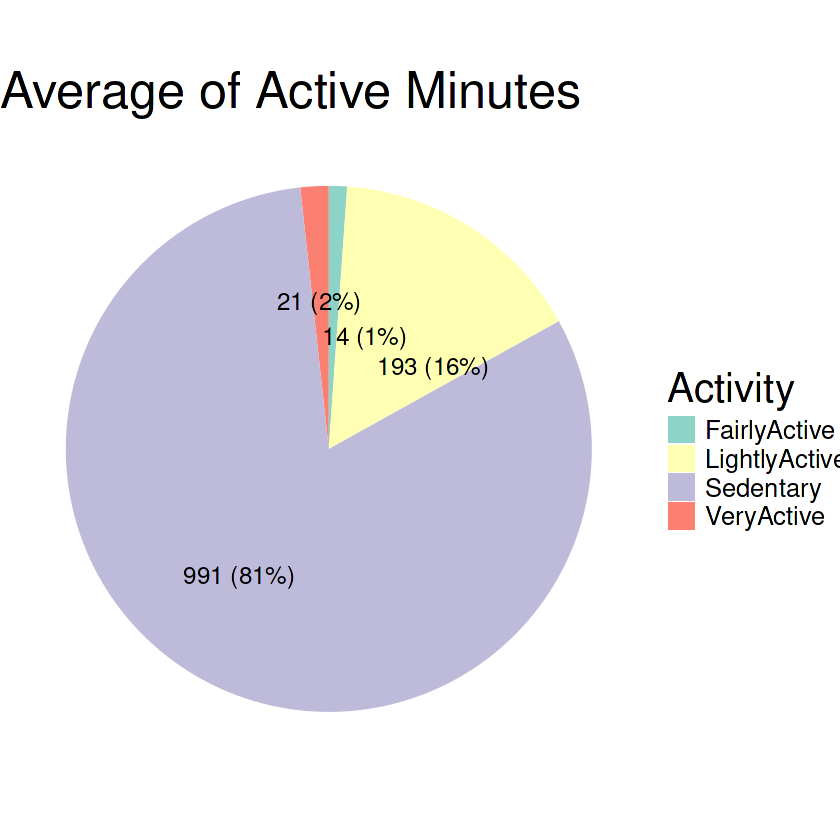

In [9]:
average_minutes <- daily_activity %>%
  summarise(
    VeryActive = mean(VeryActiveMinutes, na.rm = TRUE),
    FairlyActive = mean(FairlyActiveMinutes, na.rm = TRUE),
    LightlyActive = mean(LightlyActiveMinutes, na.rm = TRUE),
    Sedentary = mean(SedentaryMinutes, na.rm = TRUE)
  ) %>%
  gather(key = "Activity", value = "Minutes")

average_minutes <- average_minutes %>%
  mutate(Percentage = (Minutes / sum(Minutes)) * 100)

ggplot(average_minutes, aes(x = "", y = Minutes, fill = Activity)) +
  geom_bar(width = 1, stat = "identity", position = position_stack(reverse = TRUE)) +
  coord_polar(theta = "y") +
  theme_void() +
  labs(title = "Average of Active Minutes") +
  scale_fill_brewer(palette = "Set3") +
  geom_text_repel(aes(y = Minutes / 2 + c(0, cumsum(Minutes)[-length(Minutes)]),
                      label = ifelse(Percentage > 1, paste0(round(Minutes), " (", round(Percentage), "%)"), "")),
                  size = 5, 
                  direction = "both", 
                  show.legend = FALSE) +
  theme(
    plot.title = element_text(size = 30),
    legend.title = element_text(size = 24),
    legend.text = element_text(size = 15)
  )

In the chart, we observe the distribution of average minutes spent in various activity categories:

* Sedentary Minutes: Users spend the majority of their time, 81%, in sedentary activities.
* Lightly Active Minutes: Users are lightly active for 16% of their time.
* Very Active Minutes: 2% of time is spent in very active pursuits.
* Fairly Active Minutes: Account for just 1% of the time.

The Total Active Minutes are calculated as the sum of Very Active Minutes, Fairly Active Minutes, and Lightly Active Minutes. This highlights a significant portion of the day is inactive, suggesting potential areas for increasing activity levels.

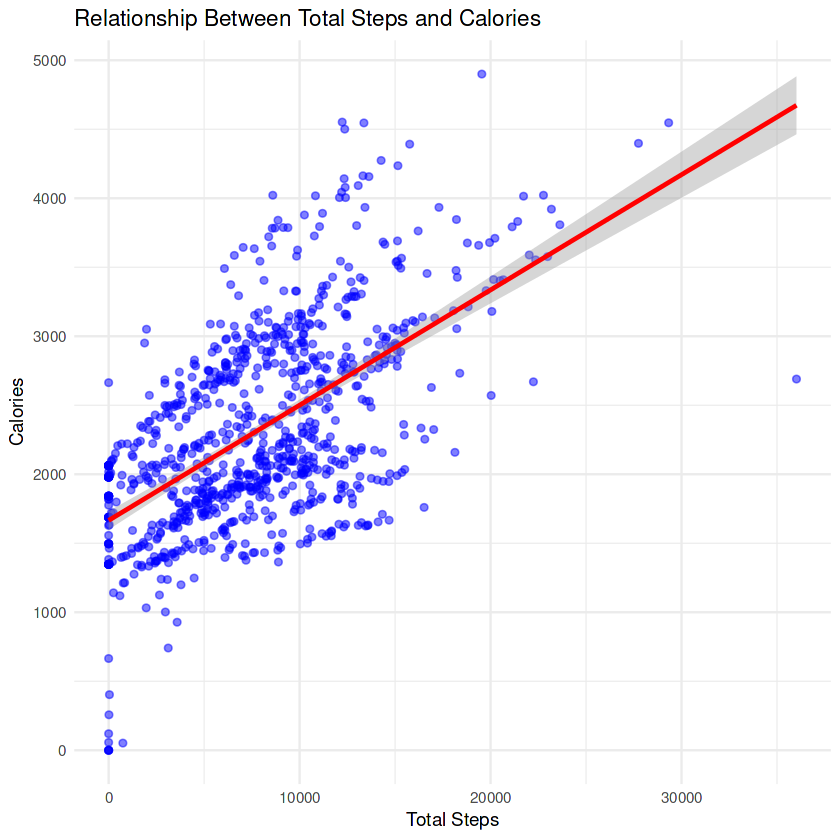

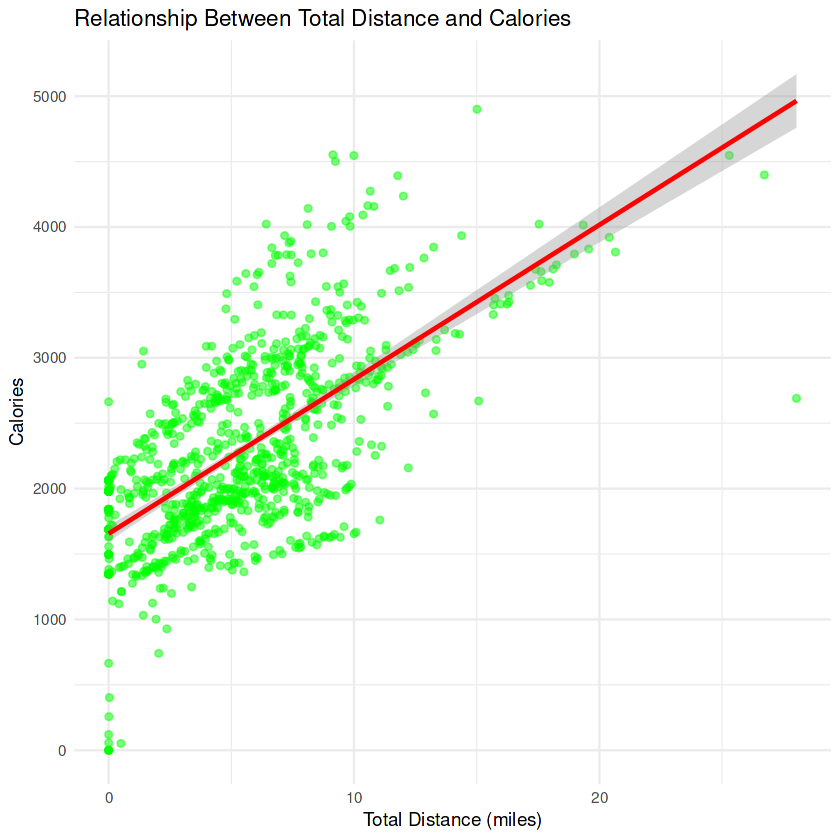

In [10]:
ggplot(daily_activity, aes(x = TotalSteps, y = Calories)) +
  geom_point(alpha = 0.5, color = "blue") +
  geom_smooth(method = "lm", , formula = y ~ x, color = "red") +
  theme_minimal() +
  labs(title = "Relationship Between Total Steps and Calories",
       x = "Total Steps",
       y = "Calories")

ggplot(daily_activity, aes(x = TotalDistance, y = Calories)) +
  geom_point(alpha = 0.5, color = "green") +
  geom_smooth(method = "lm", formula = y ~ x, color = "red") +
  theme_minimal() +
  labs(title = "Relationship Between Total Distance and Calories",
       x = "Total Distance (miles)",
       y = "Calories")

The graphs illustrate a strong positive correlation between physical activity—measured by total steps and total distance—and calories burned. As users take more steps or cover greater distances, their calorie expenditure increases, as shown by the clear upward trend lines. While most data points cluster around these trend lines, some variability exists, highlighting individual differences in calorie burn efficiency.

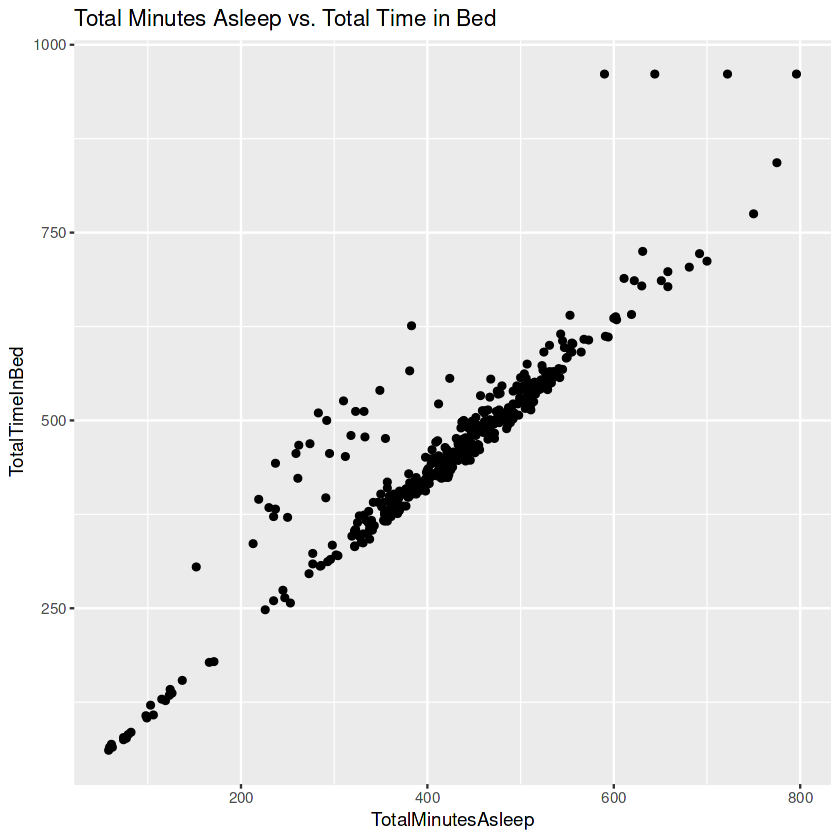

In [11]:
ggplot(data=sleep, aes(x=TotalMinutesAsleep, y=TotalTimeInBed)) + 
  geom_point()+ labs(title="Total Minutes Asleep vs. Total Time in Bed")

This scatter plot illustrates the relationship between Total Minutes Asleep and Total Time in Bed. Each point represents an individual data entry, showing a clear positive correlation. As the Total Minutes Asleep increases, the Total Time in Bed tends to increase as well. The linear trend suggests that more time in bed generally corresponds to more minutes asleep, although there is some variability, indicating differences in sleep efficiency among individuals.

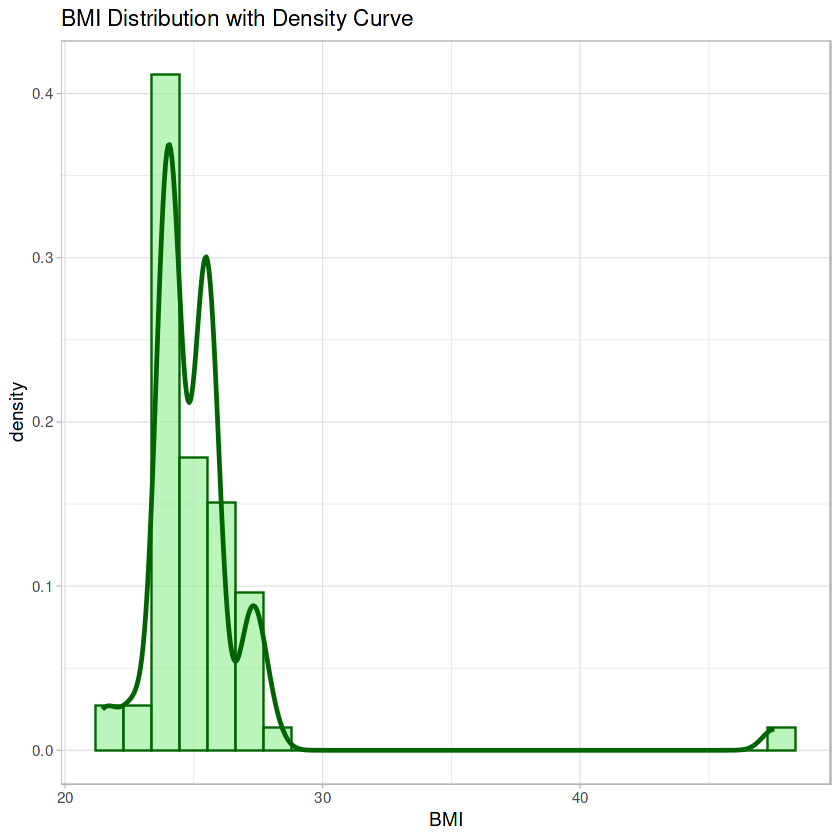

In [12]:
ggplot(data = weight) +
  geom_histogram(mapping = aes(x = BMI, y = after_stat(density)), 
                 color = "darkgreen", fill = "lightgreen", bins = 25, alpha = 0.6) +
  geom_density(mapping = aes(x = BMI), color = "darkgreen", linewidth = 1) +
  labs(title = "BMI Distribution with Density Curve") +
  theme_light()

The chart illustrates the distribution of Body Mass Index (BMI) values using a histogram with an overlaid density curve. The distribution is right-skewed, indicating that most BMI values are concentrated in the lower range, around 20 to 25. Several peaks within this range suggest that these values are particularly common. The presence of a few outliers beyond a BMI of 30 is noticeable, although these are sparse. Overall, the density curve effectively highlights the central tendency and spread of the BMI values, confirming a concentration in the lower range while also revealing the presence of some unusual values. 

In [13]:
weight_grouped <- weight %>%
    group_by(Id) %>%
    summarise(BMI = mean(BMI))

I will group the weight data frame by Id to calculate the mean BMI for each individual, resulting in weight_grouped in the following.

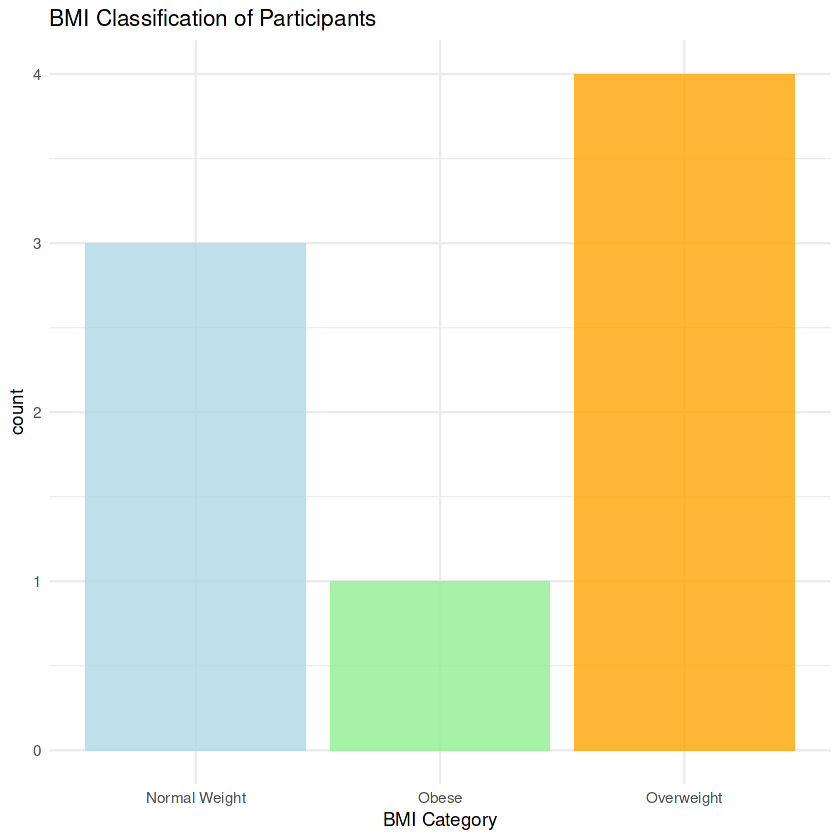

In [14]:
weight_grouped2 <- weight_grouped %>%
  mutate(
    BMI_Category = case_when(
      BMI < 18.5 ~ "Underweight",
      BMI >= 18.5 & BMI < 25 ~ "Normal Weight",
      BMI >= 25 & BMI < 30 ~ "Overweight",
      BMI >= 30 ~ "Obese"
    )
  )

library(forcats)

ggplot(data = weight_grouped2, aes(x = fct_relevel(BMI_Category, "Normal Weight"), fill = fct_relevel(BMI_Category, "Normal Weight"))) +
  geom_bar(alpha = 0.8, show.legend = FALSE) +
  labs(title = "BMI Classification of Participants", x = "BMI Category") +
  scale_fill_manual(values = c("lightblue", "lightgreen", "orange", "red")) +
  theme_minimal()

The bar chart displays the distribution of participants across different BMI categories: Normal Weight, Overweight, and Obese. It shows that the majority of participants fall into the Overweight category, followed by those with Normal Weight. The Obese category has the fewest participants. This visualization highlights the prevalence of each BMI classification among the group.

# 6. Share
Selected the charts and created effective data visualizations.

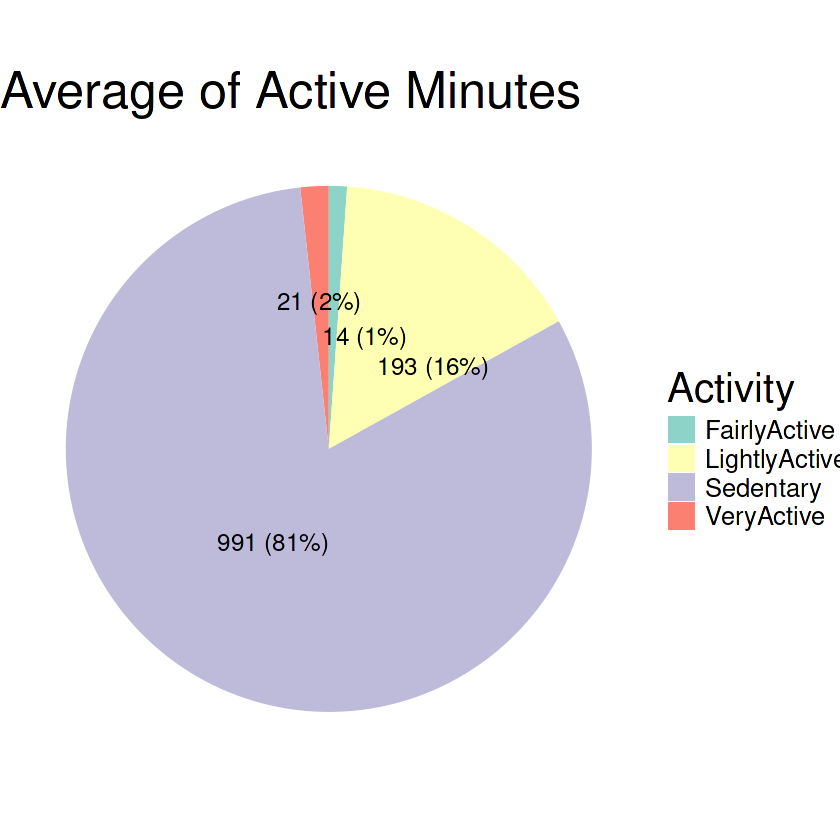

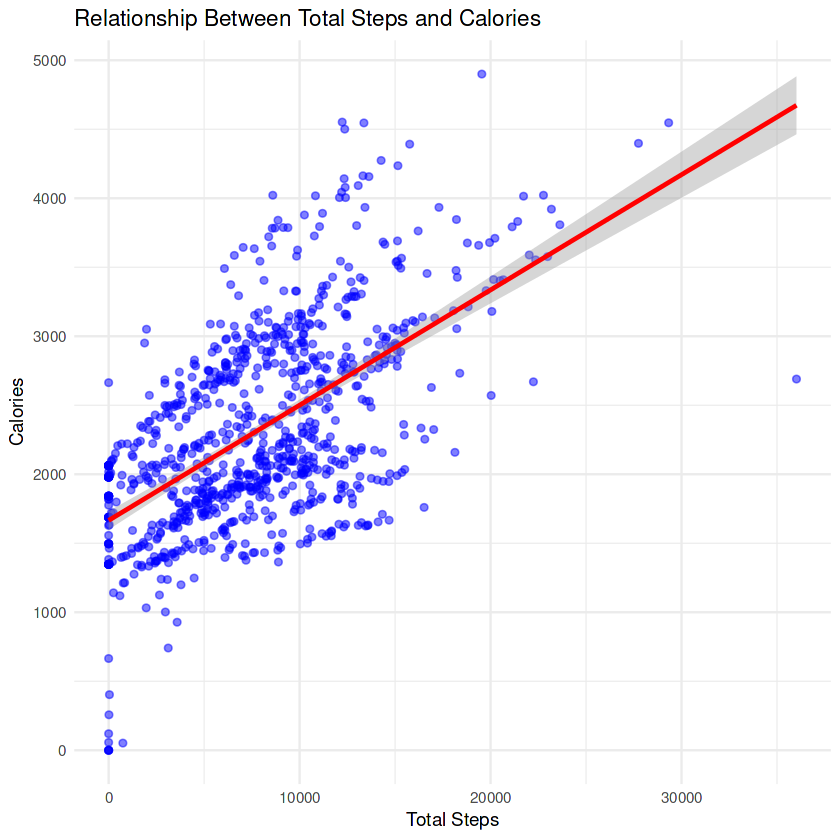

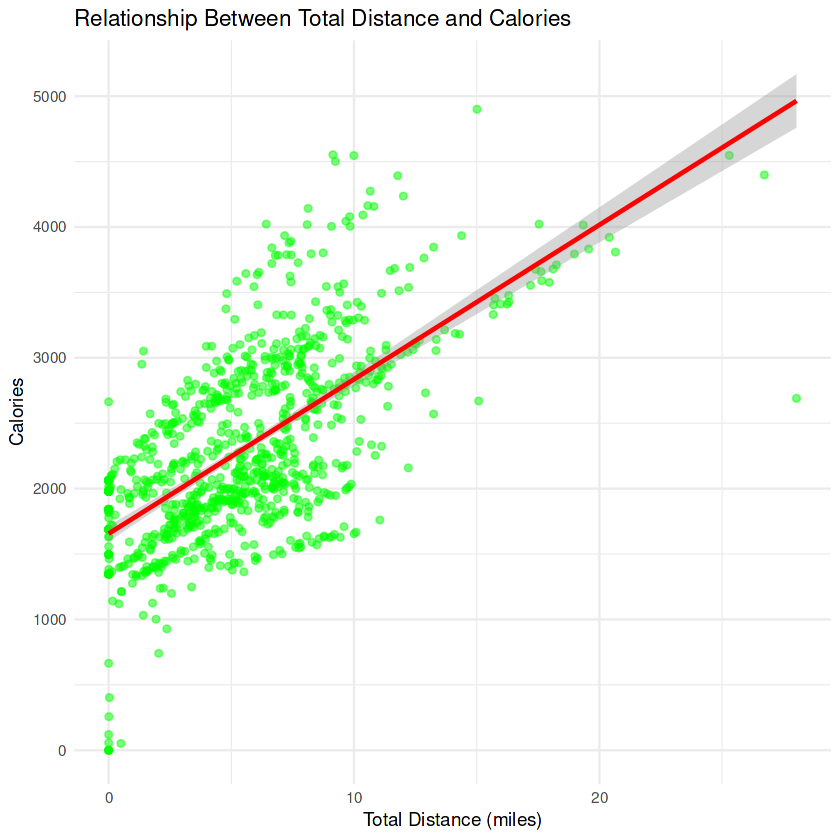

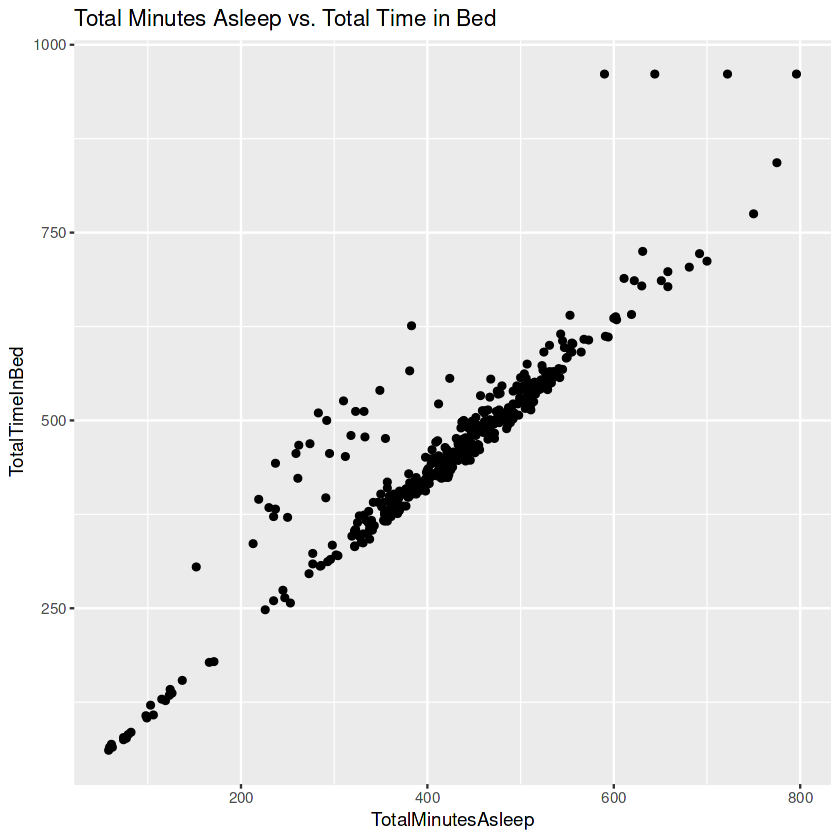

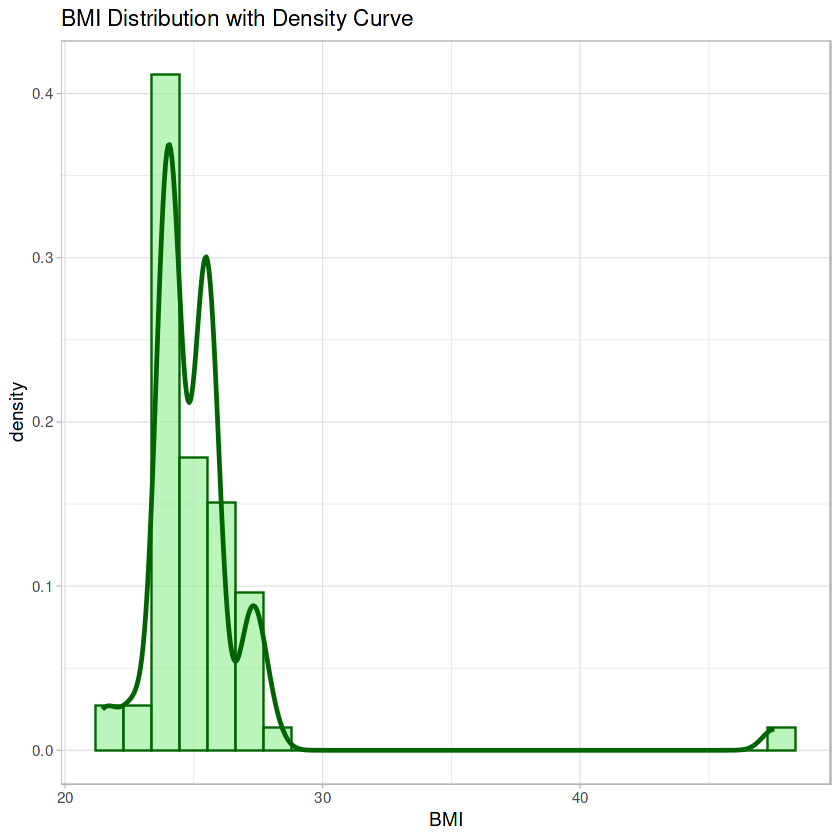

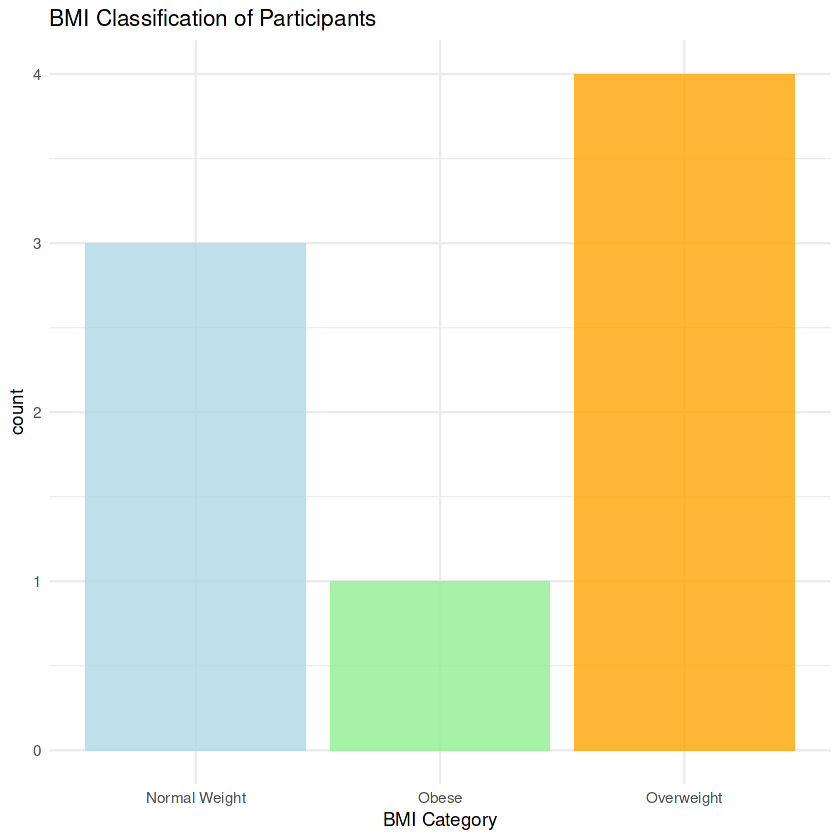

In [15]:
ggplot(average_minutes, aes(x = "", y = Minutes, fill = Activity)) +
  geom_bar(width = 1, stat = "identity", position = position_stack(reverse = TRUE)) +
  coord_polar(theta = "y") +
  theme_void() +
  labs(title = "Average of Active Minutes") +
  scale_fill_brewer(palette = "Set3") +
  geom_text_repel(aes(y = Minutes / 2 + c(0, cumsum(Minutes)[-length(Minutes)]),
                      label = ifelse(Percentage > 1, paste0(round(Minutes), " (", round(Percentage), "%)"), "")),
                  size = 5, 
                  direction = "both", 
                  show.legend = FALSE) +
  theme(
    plot.title = element_text(size = 30),
    legend.title = element_text(size = 24),
    legend.text = element_text(size = 15)
  )

ggplot(daily_activity, aes(x = TotalSteps, y = Calories)) +
  geom_point(alpha = 0.5, color = "blue") +
  geom_smooth(method = "lm", , formula = y ~ x, color = "red") +
  theme_minimal() +
  labs(title = "Relationship Between Total Steps and Calories",
       x = "Total Steps",
       y = "Calories")

ggplot(daily_activity, aes(x = TotalDistance, y = Calories)) +
  geom_point(alpha = 0.5, color = "green") +
  geom_smooth(method = "lm", formula = y ~ x, color = "red") +
  theme_minimal() +
  labs(title = "Relationship Between Total Distance and Calories",
       x = "Total Distance (miles)",
       y = "Calories")

ggplot(data=sleep, aes(x=TotalMinutesAsleep, y=TotalTimeInBed)) + 
  geom_point()+ labs(title="Total Minutes Asleep vs. Total Time in Bed")

ggplot(data = weight) +
  geom_histogram(mapping = aes(x = BMI, y = after_stat(density)), 
                 color = "darkgreen", fill = "lightgreen", bins = 25, alpha = 0.6) +
  geom_density(mapping = aes(x = BMI), color = "darkgreen", linewidth = 1) +
  labs(title = "BMI Distribution with Density Curve") +
  theme_light()

ggplot(data = weight_grouped2, aes(x = fct_relevel(BMI_Category, "Normal Weight"), fill = fct_relevel(BMI_Category, "Normal Weight"))) +
  geom_bar(alpha = 0.8, show.legend = FALSE) +
  labs(title = "BMI Classification of Participants", x = "BMI Category") +
  scale_fill_manual(values = c("lightblue", "lightgreen", "orange", "red")) +
  theme_minimal()

# 7. Act

Based on the analysis, the data reveals several key insights. The majority of participants are classified as overweight, and a significant portion of time is spent in sedentary activities. There is a strong correlation between physical activity (steps and distance) and calorie expenditure, as well as a clear relationship between time in bed and minutes asleep.

Conclusion and Recommendations for Bellabeat:
* Focus on Activity and Weight Management: Given the high prevalence of overweight participants, Bellabeat should emphasize features that encourage physical activity and weight management.
* Enhance Activity Monitoring: With most users being sedentary, introducing activity reminders and personalized fitness goals could motivate users to increase their active minutes.
* Promote Sleep Quality: Since sleep efficiency varies, offering insights into sleep patterns and tips for improvement could add value to Bellabeat products.
* Marketing Strategy: Highlight the product's ability to track and improve physical activity and sleep. Tailor marketing messages to emphasize health and wellness benefits, appealing to users looking to enhance their overall lifestyle.

By addressing these areas, Bellabeat can better meet the needs of its users and differentiate itself in the wellness market.